In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option("display.max_columns", None)

#%matplotlib notebook

In [2]:
xls = pd.ExcelFile("Superstore (2016-2020).xlsx", engine="openpyxl")

In [3]:
orders_2016 = pd.read_excel(xls, "Orders 2016")
orders_2017 = pd.read_excel(xls, "Orders 2017")
orders_2018 = pd.read_excel(xls, "Orders 2018")
orders_2019 = pd.read_excel(xls, "Orders 2019")
orders_2020 = pd.read_excel(xls, "Orders 2020")
returns = pd.read_excel(xls, "Returns")
Sales_rep = pd.read_excel(xls, "Sales Reps")

In [4]:
orders = pd.concat([orders_2016,orders_2017,orders_2018,orders_2019,orders_2020])

In [5]:
orders.shape

(11979, 22)

In [6]:
returned_orders = orders.merge(returns,on="Order ID", how="inner")

In [7]:
returned_orders.shape

(951, 23)

In [8]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 21
0,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,No
1,7,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,No
2,8,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,No
3,9,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,No
4,10,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,No


In [9]:
returned_orders = returned_orders.drop(["Unnamed: 21","Row ID"], axis=1)

In [10]:
manufactuers = pd.read_csv("Manufacturers.csv")

In [11]:
manufactuers.head()

,Manufacturer,Product Name
0,Bush,Bush Somerset Collection Bookcase
1,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Universal,Self-Adhesive Address Labels for Typewriters b...
3,Bretford,Bretford CR4500 Series Slim Rectangular Table
4,Eldon,Eldon Fold 'N Roll Cart System


In [12]:
manufactuers.shape

(1850, 2)

In [13]:
orders.rename(columns={"Unnamed: 21":"Returned"}, inplace=True)

In [14]:
orders = orders.merge(manufactuers, on="Product Name", how="left")

In [15]:
returned_orders = orders[orders["Returned"]=="Yes"]

In [16]:
returned_orders.shape

(950, 23)

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 11978
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          11979 non-null  int64         
 1   Order ID        11979 non-null  object        
 2   Order Date      11979 non-null  datetime64[ns]
 3   Ship Date       11979 non-null  datetime64[ns]
 4   Ship Mode       11979 non-null  object        
 5   Customer ID     11979 non-null  object        
 6   Customer Name   11979 non-null  object        
 7   Segment         11979 non-null  object        
 8   Country/Region  11979 non-null  object        
 9   City            11979 non-null  object        
 10  State           11979 non-null  object        
 11  Postal Code     11968 non-null  float64       
 12  Region          11979 non-null  object        
 13  Product ID      11979 non-null  object        
 14  Category        11979 non-null  object        
 15  Su

In [18]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,11979.000000,11968.000000,11979.000000,11979.000000,11979.000000,11979.000000
mean,4993.471659,55523.083974,232.052514,3.791719,0.156595,28.012171
std,2886.494336,32001.416127,647.015821,2.228014,0.206362,228.833674
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2523.500000,23320.000000,17.088000,2.000000,0.000000,1.713700
50%,4981.000000,60072.000000,53.900000,3.000000,0.200000,8.537200
75%,7497.500000,90008.000000,210.910000,5.000000,0.200000,29.145600
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
orders_all = orders.copy() #making a copy the datafram that contains all the order both the returned and the unreturned items

In [20]:
orders = orders[orders["Returned"]=="No"] # Removing the returned orders

## WHICH REGION HAS THE HIGHEST SALES
- The East region had the most sales after all the returned items had been substracted
- The West region had the most sales if orders had not been returned

<AxesSubplot:xlabel='Region'>

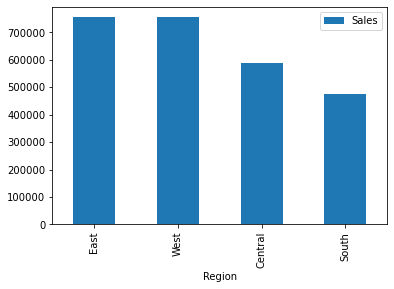

In [23]:
orders.groupby(["Region"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).plot(kind="bar")

## WHICH CATEGORY HAS THE HIGHEST SALES
- Technology had the most sales

<AxesSubplot:xlabel='Category'>

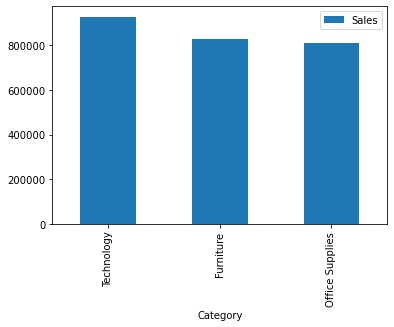

In [25]:
orders.groupby(["Category"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).plot(kind="bar")

## WHICH SUBCATGORY HAS THE HIGHEST SALES AND WHICH HAS THE LOWEST SALES
- The top 5 categories based on sales (excluding the returned orders) are 
        - Chairs                   
        - Phones
        - Storage
        - Machines and 
        - Tables
       They contribute 61.9% of the Totals sales
    INCLUDING THE RETURNED ORDERS, the top 5 categories are
        - Phones
        - Chairs
        - Storage
        - Tables and 
        - Machines
- The bottom 5 categories based on sales (excluding or including the returned orders) are 
    - Fasteners
    - Labels
    - Envelopes
    - Art
    - Supplies

In [46]:
# What is Total sales of the top 5 category
pls = orders_all.groupby(["Sub-Category"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
#pls.loc[["Chairs", "Phones", "Storage", "Machines", "Tables"]]["Sales"].sum()
pls.iloc[:5]["Sales"].sum() 

1590751.3384999998

In [49]:
# What is the total sales
orders["Sales"].sum()

2570033.2445

In [50]:
# What percentage of the total sales was contributed by the top 5 category
(1590751.3384999998/2570033.2445) * 100

61.89613857736227

<AxesSubplot:xlabel='Sub-Category'>

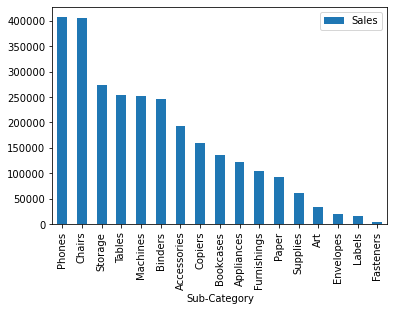

In [26]:
orders_all.groupby(["Sub-Category"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).plot(kind="bar")

## WHICH SEGMENT HAS THE HIGHEST SALES
- The Consumer segment has the highest sales and contributes 50.8% of the total sales

In [38]:
# What is the sales of The Top segments
pls = orders.groupby(["Segment"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
pls.iloc[0]["Sales"]

1305645.8633

In [39]:
pls["Sales"].sum()

2570033.2445

In [41]:
(1305645.8633/2570033.2445)*100

50.80268382108082

<AxesSubplot:xlabel='Segment'>

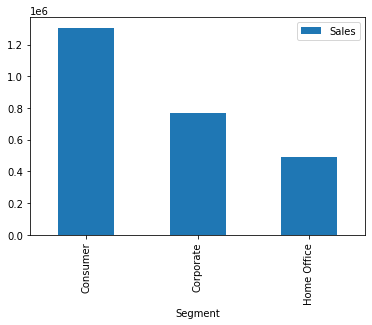

In [42]:
orders.groupby(["Segment"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).plot(kind="bar")

## WHICH SHIPPING MODE HAS THE HIGHEST SALES
- Standard Class has the highest sales and contributes 60.6% of the total sales

In [43]:
# What is the sales of The Top Ship Mode
pls = orders.groupby(["Ship Mode"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
pls.iloc[0]["Sales"]

1558513.2967

In [48]:
# what is the total sales
orders["Sales"].sum()

2570033.2445

In [52]:
# What percentage of sales was contributed by the standard class
(1558513.2967/2570033.2445)*100

60.64175628993503

<AxesSubplot:xlabel='Ship Mode'>

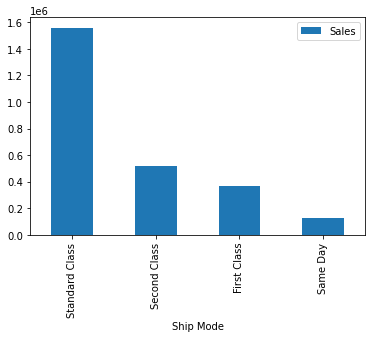

In [53]:
orders.groupby(["Ship Mode"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).plot(kind="bar")

## WHICH MANUFACTURERS HAVE THE HIGHEST SALES AND THE LOWEST SALES
- The top 5 manufacturers besides the Others are
     - Hon
     - Global
     - GBC
     - Canon 
     - Fellowes
     they contribute 23.9% of the total sales
     
- The bottom 5 manufacturers are 
    - 3-ring stable pack
    - hammemil
    - Staple-on labels
    - Stockwell
    - Quartet

In [61]:
# What is the sales of The Top 5 Manufacturers
pls = orders.groupby(["Manufacturer"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
pls.iloc[1:6]["Sales"].sum()

613493.2307

In [58]:
# What is the total sales 
orders["Sales"].sum()

2570033.2445

In [62]:
# What percentage of the sales was contributed by the top 5 manufacturers besides the "Others"
(613493.2307/2570033.2445) * 100

23.8710231477708

<AxesSubplot:xlabel='Manufacturer'>

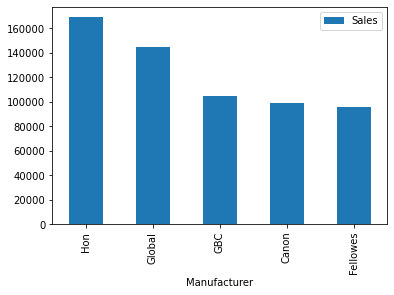

In [376]:
orders.groupby(["Manufacturer"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[1:6].plot(kind="bar")

<AxesSubplot:xlabel='Manufacturer'>

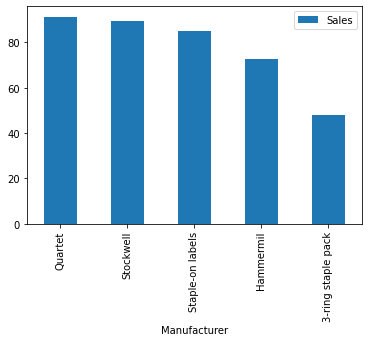

In [377]:
orders.groupby(["Manufacturer"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[-5:].plot(kind="bar")

## WHAT CITY OR STATE HAD THE HIGHEST SALES OR LOWEST SALES
- The Top 5 states based on sales are (exluding the returned orders)
    - California
    - New York
    - Texas 
    - Washington
    - Pennsylvania 
         
         - And they contribute 50.9% of the total sales
    
- The Bottom 5 states based on sales (excluding the returned orders)
    - North Dakota
    - west virginia
    - South dakota
    - Wyoming
    - Maine
    
- The Top 5 Cities based on sales (excluding returned orders) are
    - New york city
    - Los angeles
    - San Francisco
    - phiolladephia
    - Seattle
        
        - And they contribute 32% of the total sales

In [63]:
# What is the sales of The Top 5 State
pls = orders.groupby(["State"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
A = pls.iloc[:5]["Sales"].sum()

# What is the total sales 
B = orders["Sales"].sum()

# What percentage of the sales was contributed by the top 5 States
(A/B) * 100

50.910270199814136

In [68]:
# What is the sales of The Top 5 State
pls = orders.groupby(["City"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).reset_index()
A = pls.iloc[:5]["Sales"].sum()

# What is the total sales 
B = orders["Sales"].sum()

# What percentage of the sales was contributed by the top 5 States
(A/B) * 100

32.042483448894544

<AxesSubplot:xlabel='State'>

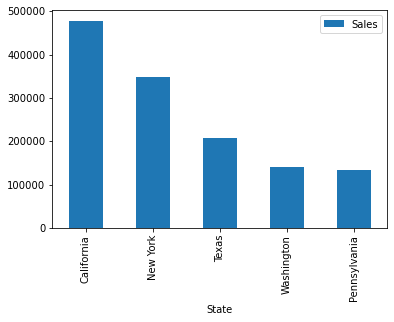

In [66]:
orders.groupby(["State"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[:5].plot(kind="bar")

<AxesSubplot:xlabel='State'>

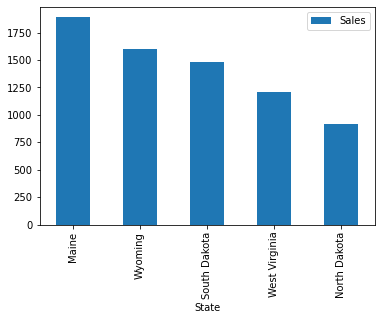

In [67]:
orders.groupby(["State"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[-5:].plot(kind="bar")

<AxesSubplot:xlabel='City'>

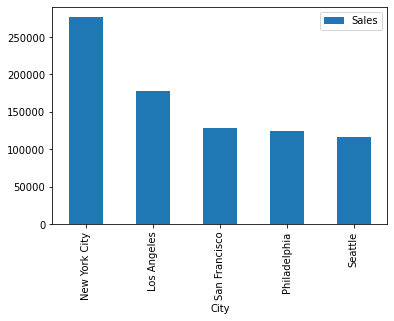

In [380]:
orders.groupby(["City"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[:5].plot(kind="bar")

<AxesSubplot:xlabel='City'>

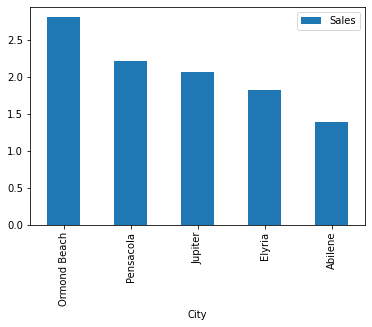

In [381]:
orders.groupby(["City"]).agg({"Sales":"sum"}).sort_values("Sales", ascending=False).iloc[-5:].plot(kind="bar")

## WHICH STATE AND CITY HAD THE HIGHEST NET PROFIT AND MOST LOSSES
- The top 5 states based on net profit (excluding the returned orders) are
    - New York
    - california
    - washington
    - Michigan
    - Virginia
    
        - And they contribute 75.5% of the total net profit
- The Bottom 5 states based on net profit (excluding the returned orders) are
    - Texas
    - Pennsylvania
    - Ohio
    - illinios
    - North Carolina
        - And the reduced by total net profit 26.6%

- The Top 5 cities based on net profit (excluding the returned orders) are
    - New York city
    - Los Angelle
    - Seattle
    - san Francisco
    - Detroit
    
        - They contribute 48.8% of the net profit

In [69]:
# What is the profit of The Top 5 State
pls = orders.groupby(["State"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[:5]
A = pls["Profit"].sum()
# What is the total sales 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the top 5 States
(A/B) * 100

75.53230019675915

In [71]:
# What is the profit of The Top 5 City
pls = orders.groupby(["City"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[:5]
A = pls["Profit"].sum()
# What is the total sales 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the top 5 States
(A/B) * 100

48.79376100941806

In [70]:
pls = orders.groupby(["State"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:]
A = pls["Profit"].sum()
# What is the total sales 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the bottom 5 States
(A/B) * 100

-26.620310719129396

In [72]:
pls = orders.groupby(["City"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:]
A = pls["Profit"].sum()
# What is the total sales 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the bottom 5 States
(A/B) * 100

-15.475752930085765

<AxesSubplot:xlabel='State'>

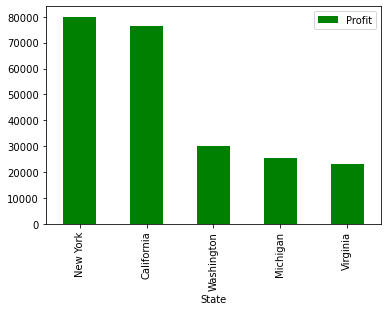

In [73]:
orders.groupby(["State"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[:5].plot(kind="bar", color="Green")

<AxesSubplot:xlabel='State'>

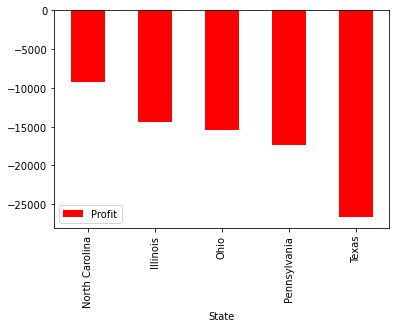

In [74]:
orders.groupby(["State"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:].plot(kind="bar",color="red")

<AxesSubplot:xlabel='City'>

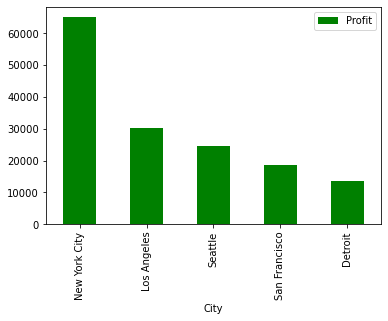

In [75]:
orders.groupby(["City"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[:5].plot(kind="bar",color="Green")

<AxesSubplot:xlabel='City'>

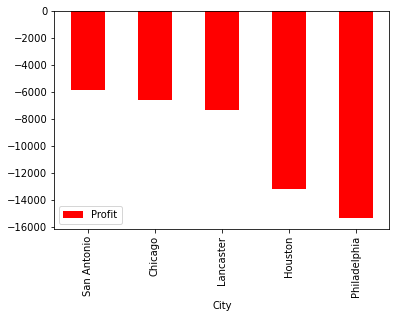

In [76]:
orders.groupby(["City"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:].plot(kind="bar", color="red")

## WHICH MANUFACTURER HAS THE HIGHEST NET PROFIT AND MOST LOSSES
- The top 5 manufacturers based on net profit (excluding the returned orders) are
    - canon
    - xenox
    - Hewlett-Packard
    - Fellowes
    - Longitech
        - they contribute 46.5% of the total net profit
    
- The bottom 5 manufacturers based on Net profit are 
    - Cubify
    - 
    - O'sullivan
    - Bevis
    - Balt

In [77]:
# What is the profit of The Top 5 Manufacturers
pls = orders.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[:5]
A = pls["Profit"].sum()
# What is the Profit 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the top 5 Manufacturers
(A/B) * 100

46.509576855254444

In [79]:
# What is the profit of The Bottom 5 Manufacturers
pls = orders.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:]
A = pls["Profit"].sum()
# What is the Profit 
B = orders["Profit"].sum()

# What percentage of the profit was contributed by the Bottom 5 Manufacturers
(A/B) * 100

-8.358164489632953

<AxesSubplot:xlabel='Manufacturer'>

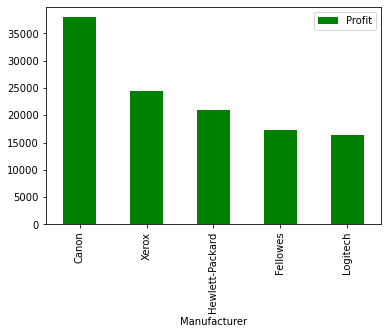

In [80]:
orders.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[1:6].plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Manufacturer'>

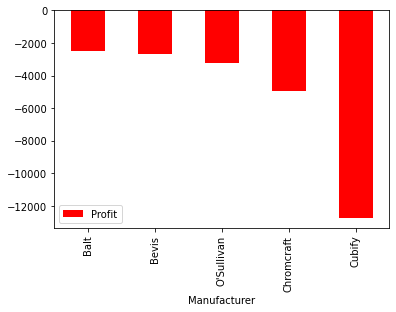

In [81]:
orders.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:].plot(kind="bar",color="red")

In [83]:
orders["Unit Price"] = orders["Sales"]/orders["Quantity"] # Determining the Unit price of each product
orders["Cost Price"] = orders["Sales"] - orders["Profit"] # Determining the Cost price of each product in an order

## WHAT WAS THE PERCENTAGE NET PROFIT OR LOSS
- The Percentage of net profit is 13.8% (Excluding the returned otherwise)

In [85]:
(orders["Profit"].sum()/orders["Cost Price"].sum())*100

13.810013538073337

# LOOKING INTO PROFIT WITHOUT TAKING INTO ACCOUNT THE LOSSES INCURRED

In [87]:
Profits = orders[orders["Profit"]>0]   # Filtering the orders that had a profit
Losses = orders[orders["Profit"]<0]    # Filtering the orders that had a loss

### WHICH SUBCATEGORY HAS THE HIGHEST PROFIT

<AxesSubplot:xlabel='Sub-Category'>

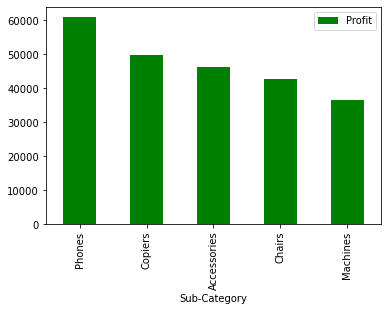

In [88]:
Profits.groupby(["Sub-Category"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[1:6].plot(kind="bar",color="Green")

### WHICH SUBCATGORY HAS THE MOST LOSSES

<AxesSubplot:xlabel='Sub-Category'>

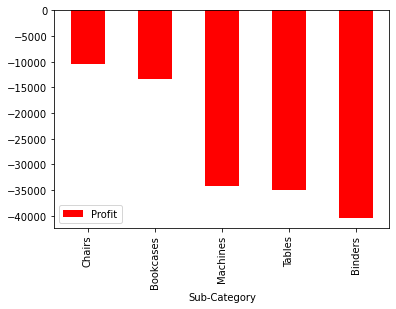

In [89]:
Losses.groupby(["Sub-Category"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:].plot(kind="bar",color="red")

### WHICH MANUFACTURER HAS THE HIGHEST PROFIT

<AxesSubplot:xlabel='Manufacturer'>

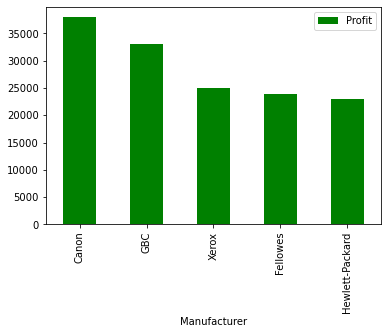

In [90]:
Profits.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[1:6].plot(kind="bar",color="Green")

### WHICH MANUFACTURER HAS THE MOST LOSSES

<AxesSubplot:xlabel='Manufacturer'>

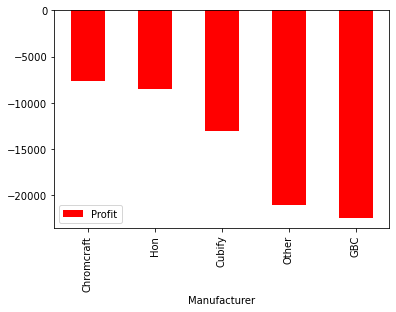

In [91]:
Losses.groupby(["Manufacturer"]).agg({"Profit":"sum"}).sort_values("Profit", ascending=False).iloc[-5:].plot(kind="bar",color="red")

## WHAT ARE THE FACTORS THAT AFFECT SALES
- DISCOUNT SEEMS LIKE THE MAJOR CAUSE OF THE LOSSES INCURED

In [92]:
orders[["Sales", "Cost Price","Profit"]]

,Sales,Cost Price,Profit
0,48.860,34.6906,14.1694
1,7.280,5.3144,1.9656
2,907.152,816.4368,90.7152
3,18.504,12.7215,5.7825
4,114.900,80.4300,34.4700
...,...,...,...
11972,209.300,152.7890,56.5110
11973,323.136,311.0184,12.1176
11974,90.930,88.2021,2.7279
11975,52.776,32.9850,19.7910


In [94]:
orders["Percentage Loss or Profit"] = (orders["Profit"]/orders["Cost Price"])*100 # The determimg the Percentage profit or loss of each transaction
df_profit = orders[orders["Percentage Loss or Profit"] >0]
df_loss = orders[orders["Percentage Loss or Profit"] <0]

## WHAT IS THE RELATIONSHIP BETWEN DISCOUNT AND PERCENTAGE LOSS
- The higher the discount the higher percentage loss

<AxesSubplot:xlabel='Discount', ylabel='Percentage Loss or Profit'>

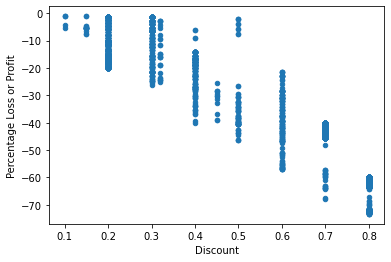

In [95]:
df_loss.plot(kind="scatter", x="Discount", y="Percentage Loss or Profit")

## WHAT IS THE RELATIONSHIP BETWEN DISCOUNT AND PERCENTAGE PROFIT
- The maximum percentage at whicjh there was a profit was 40%

<AxesSubplot:xlabel='Discount', ylabel='Percentage Loss or Profit'>

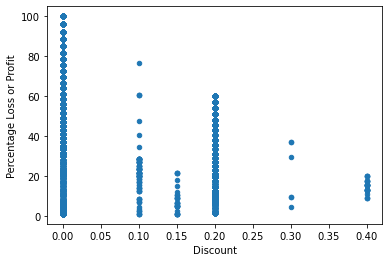

In [96]:
df_profit.plot(kind="scatter", x="Discount", y="Percentage Loss or Profit")

## WHAT IS THE DISCOUNTED AMOUNT
- The discounted amount is $645178.55

In [97]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Manufacturer,Unit Price,Cost Price,Percentage Loss or Profit
0,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,No,Eldon,6.980,34.6906,40.845070
1,7,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,No,Newell,1.820,5.3144,36.986301
2,8,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,No,Mitel,151.192,816.4368,11.111111
3,9,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,No,DXL,6.168,12.7215,45.454545
4,10,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,No,Belkin,22.980,80.4300,42.857143


In [98]:
def sales_without_discount(df): # Defining a function tha determines the percentage of sales that was paid
    if df==0:
        return 1
    else:
        return 1-df

    
    
orders["Discount_1"] = orders["Discount"].apply(sales_without_discount) # Determimg what percent of the sales was paid
orders["Sales without discount"] = orders["Sales"] /orders["Discount_1"] # Determing the sales without discount
orders["Unit Price Without Discount"] = orders["Sales without discount"]/orders["Quantity"] # determing the unit price without discount
orders["Profit without discount"] = orders["Profit"] + orders["Sales without discount"]-orders["Sales"] # determing the profit of each sales without discount

In [100]:
orders["Discounted Amount"] = orders["Discount"] * orders["Sales without discount"] # Determining the discounted amount
orders["Discounted Amount"].sum()

645178.5455

In [103]:
# Defining a function that determines the net discount of a category
def category_discount(category):
    category_discount = orders.groupby([category]).agg({"Discounted Amount":"sum",
                            "Sales without discount":"sum"})
    #category_discount["Discount"] = category_discount["Discounted Amount"]/category["Sales without discount"]
    return category_discount

def category_discount2(category):
    Brand_discount = category_discount(category)
    Brand_discount["Discount"] = Brand_discount["Discounted Amount"]/Brand_discount["Sales without discount"]
    Brand_discount.sort_values("Discount", ascending=False, inplace=True)
    return Brand_discount

## WHICH STATE HAD THE MOST DISCOUNT
 - The States that had the most discounts are 
     - tennesse
     - Ohio
     - Florida
     - Illinois 
     - North carolina. 
           - These states also had the most losses

In [104]:
State_discount = category_discount2("State")
State_discount

,Discounted Amount,Sales without discount,Discount
State,,,
Tennessee,21079.9070,50491.41,0.417495
Ohio,55333.6430,138081.14,0.400733
Florida,79364.9475,200612.64,0.395613
Illinois,61281.1970,155338.15,0.394502
North Carolina,37504.6000,99176.96,0.378158
Pennsylvania,80479.1290,213234.35,0.377421
Texas,125595.3400,333855.02,0.376197
Arizona,22586.6670,60148.13,0.375517
Colorado,19022.5640,51429.04,0.369880


## WHICH CITY HAD THE MOST DISCOUNT

In [105]:
City_discount = category_discount2("City")
City_discount

,Discounted Amount,Sales without discount,Discount
City,,,
Abilene,5.568,6.96,0.800000
Romeoville,71.616,89.52,0.800000
Deer Park,27.696,34.62,0.800000
Missouri City,25.480,31.85,0.800000
Oswego,2477.124,3121.08,0.793675
...,...,...,...
Revere,0.000,906.46,0.000000
Montebello,0.000,27.88,0.000000
Richmond,0.000,20811.81,0.000000


## WHICH SUBCATEGORY HAD THE MOST DISCOUNT

In [106]:
Subcategory_discount = category_discount2("Sub-Category")
Subcategory_discount

,Discounted Amount,Sales without discount,Discount
Sub-Category,,,
Binders,136799.0090,370769.91,0.368959
Machines,130818.7120,365252.42,0.358160
Tables,77708.2805,309233.58,0.251293
Bookcases,36536.0630,162156.16,0.225314
Appliances,21995.6080,132469.99,0.166042
Chairs,74764.9830,453320.17,0.164928
Copiers,27619.5880,168797.56,0.163626
Phones,71916.7100,446942.41,0.160908
Furnishings,17727.6520,112735.89,0.157249


## WHICH CATEGORY HAD THE MOST DISCOUNT

In [107]:
Category_discount = category_discount2("Category")
Category_discount

,Discounted Amount,Sales without discount,Discount
Category,,,
Technology,243509.5420,1171704.13,0.207825
Furniture,206736.9785,1037445.80,0.199275
Office Supplies,194932.0250,1006061.86,0.193757


## WHICH SEGMENT HAD THE MOST DISCOUNT

In [108]:
Segment_discount = category_discount2("Segment")
Segment_discount

,Discounted Amount,Sales without discount,Discount
Segment,,,
Home Office,139007.5017,632564.56,0.219752
Consumer,333992.1367,1639638.00,0.203699
Corporate,172178.9071,943009.23,0.182585


## WHICH SHIPPING MODE HAD THE HIGHEST DISCOUNT

In [109]:
Shipmode_discount = category_discount2("Ship Mode")
Shipmode_discount

,Discounted Amount,Sales without discount,Discount
Ship Mode,,,
Standard Class,414634.9233,1973148.22,0.210139
Same Day,32159.1100,155604.72,0.206672
First Class,95189.3016,463233.24,0.205489
Second Class,103195.2106,623225.61,0.165582


## WHAT IS THE PERCENTAGE PROFIT OR LOSS OF EACH EACH CATEGORY WITH RESPECT TO THIER COST PRICE. WHICH IS THE MOST PROFITABLE

In [110]:
def percentage_loss_profit(category,df):
    asdf = df.groupby([category]).agg({"Cost Price": "sum", "Profit":"sum"})
    asdf["percentage loss or profit"] = asdf["Profit"]/asdf["Cost Price"]
    return asdf.sort_values("percentage loss or profit")

#### WHICH SEGMENT HAS THE HIGHEST PROFIT PERCENTAGE

In [111]:
Segment_percent = percentage_loss_profit("Segment", orders)
Segment_percent

,Cost Price,Profit,percentage loss or profit
Segment,,,
Consumer,1.162989e+06,142656.5750,0.122664
Corporate,6.725029e+05,98327.3974,0.146211
Home Office,4.226863e+05,70870.7827,0.167668


#### WHICH MANUFACTURER HAS THE HIGHEST PROFIT PERCENTAGE
- The most profitable manufacturers based of their profit percentage with respect to their cost price are
    - strathmore
    - Array
    - hammermil
    - adams 
    - stable Envelope

In [113]:
manufacturer_pecent = percentage_loss_profit("Manufacturer",orders)
manufacturer_pecent

,Cost Price,Profit,percentage loss or profit
Manufacturer,,,
Cubify,31819.9038,-12719.9608,-0.399749
Epson,4029.0369,-1282.7199,-0.318369
Bestar,3401.6598,-830.9169,-0.244268
Balt,12655.5597,-2495.1997,-0.197162
iOttie,559.1203,-79.3603,-0.141938
...,...,...,...
Staple envelope,1133.7018,919.1022,0.810709
Adams,620.9012,510.2268,0.821752
Hammermil,39.3417,33.4563,0.850403


#### WHICH CATEGORY HAS THE HIGHEST PROFIT PERCENTAGE

In [114]:
category_percent = percentage_loss_profit("Category",orders)
category_percent

,Cost Price,Profit,percentage loss or profit
Category,,,
Furniture,808923.4075,21785.4140,0.026931
Technology,777467.5783,150727.0097,0.193869
Office Supplies,671787.5036,139342.3314,0.207420


#### WHICH SUBCATEGORY HAS THE HIGHEST PROFIT PERCENTAGE

In [115]:
Subcategory_percent = percentage_loss_profit("Sub-Category",orders)
Subcategory_percent

,Cost Price,Profit,percentage loss or profit
Sub-Category,,,
Tables,250617.0573,-19091.7578,-0.076179
Bookcases,129687.2654,-4067.1684,-0.031361
Supplies,58661.1529,-831.4669,-0.014174
Machines,232005.6205,2428.0875,0.010466
Chairs,346304.4227,32250.7643,0.093128
Storage,233143.7367,23447.8073,0.100572
Furnishings,82314.6621,12693.5759,0.154208
Phones,321808.6200,53217.0800,0.165369
Appliances,93062.8808,17411.5012,0.187094


## WHAT WOULD HAVE BEEN THE SALES, COST PRICE AND PROFIT WITHOUT DISCOUNT WITHOUT DISCOUNT 
- Without Discount, the Total sales (excluding returned products) is $3215211.79 which is 20.06% higher than the Total sales

### WHAT IS THE TOTAL SALES WITHOUT DISCOUNT

In [116]:
orders["Sales without discount"].sum()

3215211.79

###  WHAT IS THE NET PROFT WITHOUT DISCOUNT

In [117]:
orders["Profit without discount"].sum()

957033.3005999998

### HOW MUCH DID DISCOUNT COST THE SUPERMARKET

In [118]:
orders["Sales without discount"].sum() - orders["Sales"].sum()

645178.5455

In [119]:
((orders["Sales without discount"].sum() - orders["Sales"].sum())/orders["Sales without discount"].sum())*100

20.066440024468807

# WITHOUT DISCOUNT 

### WHICH REGION HAD THE HIGHEST SALES
- without discount the east region had the most sales, followed by the West, with the south hving the least sales. 

<AxesSubplot:xlabel='Region'>

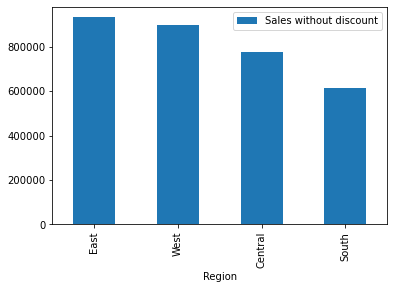

In [120]:
orders.groupby(["Region"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).plot(kind="bar")

### WHICH SEGMENT HAD THE HIGHEST SALES

<AxesSubplot:xlabel='Segment'>

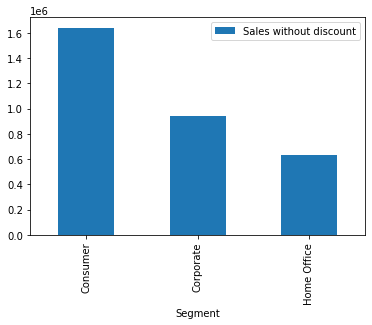

In [121]:
orders.groupby(["Segment"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).plot(kind="bar")

### WHICH SUBCATEGORY HAD THE HIGHEST SALES

<AxesSubplot:xlabel='Sub-Category'>

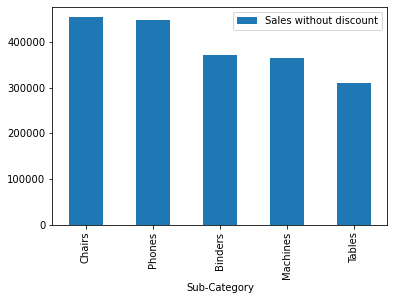

In [122]:
orders.groupby(["Sub-Category"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).iloc[:5].plot(kind="bar")

### WHICH SUBCATEGORY HAD THE LEAST SALES

<AxesSubplot:xlabel='Sub-Category'>

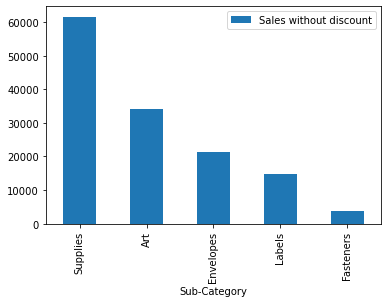

In [123]:
orders.groupby(["Sub-Category"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).iloc[-5:].plot(kind="bar")

### WHICH CATEGORY HAS THE HIGHEST SALES

<AxesSubplot:xlabel='Category'>

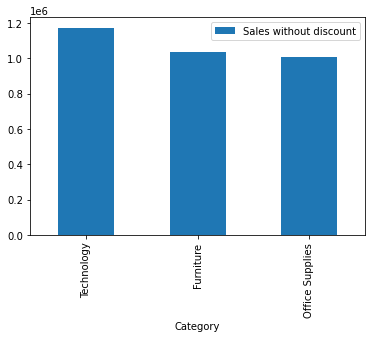

In [124]:
orders.groupby(["Category"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).plot(kind="bar")

### WHCIH SHIP MODE HAS THE HIGHEST SALES

<AxesSubplot:xlabel='Ship Mode'>

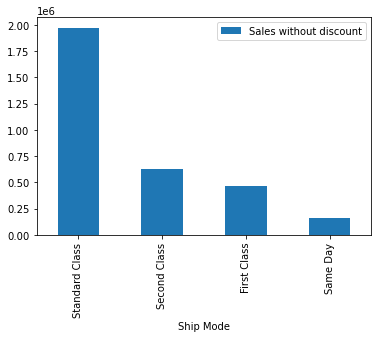

In [125]:
orders.groupby(["Ship Mode"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).plot(kind="bar")

### WHICH MANUFACTURERS HAS THE HIGHEST SALES

<AxesSubplot:xlabel='Manufacturer'>

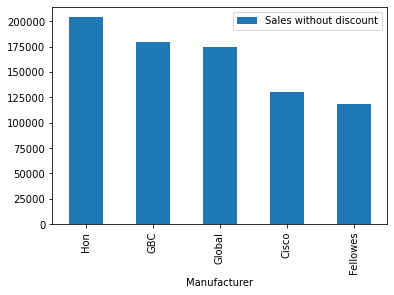

In [126]:
orders.groupby(["Manufacturer"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).iloc[1:6].plot(kind="bar")

### WHICH MANUFACTURERS HAD THE LEAST SALES

<AxesSubplot:xlabel='Manufacturer'>

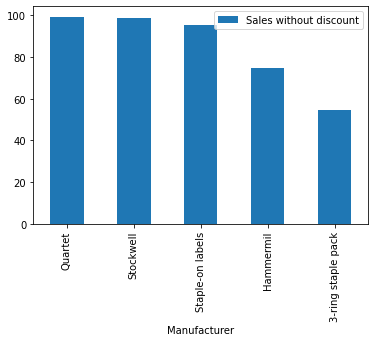

In [127]:
orders.groupby(["Manufacturer"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).iloc[-5:].plot(kind="bar")

### WHICH SUBCATEGORY, SEGMENT, MANUFACTURER HAD THE HIGHEST PROFIT

<AxesSubplot:xlabel='Region'>

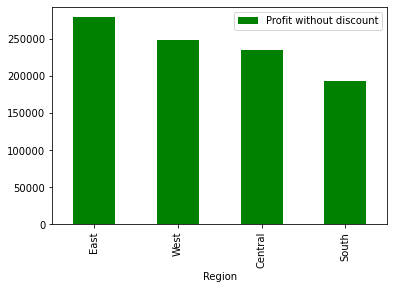

In [128]:
#orders.groupby(["Ship Mode"]).agg({"Sales without discount":"sum"}).sort_values("Sales without discount", ascending=False).plot(kind="bar")
orders.groupby(["Region"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Category'>

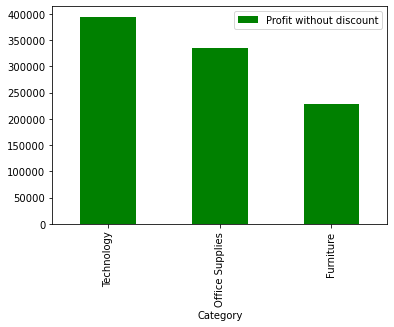

In [129]:
orders.groupby(["Category"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Sub-Category'>

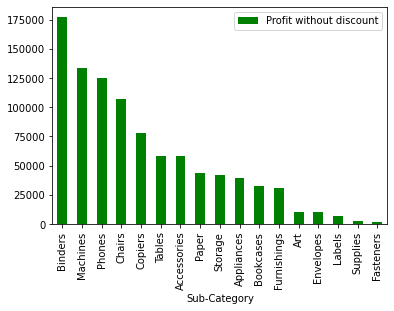

In [130]:
orders.groupby(["Sub-Category"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Sub-Category'>

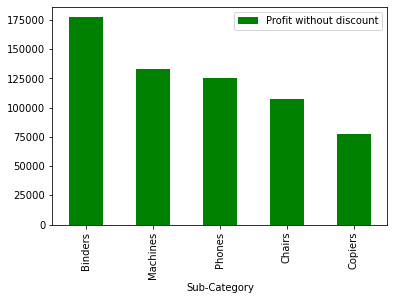

In [131]:
orders.groupby(["Sub-Category"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).iloc[:5].plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Sub-Category'>

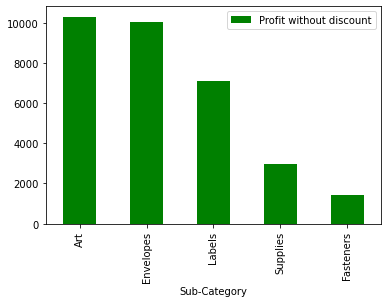

In [132]:
orders.groupby(["Sub-Category"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).iloc[-5:].plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Manufacturer'>

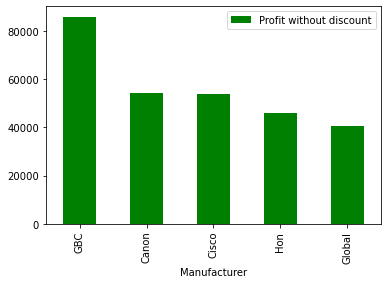

In [133]:
orders.groupby(["Manufacturer"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).iloc[1:6].plot(kind="bar",color="Green")

<AxesSubplot:xlabel='Manufacturer'>

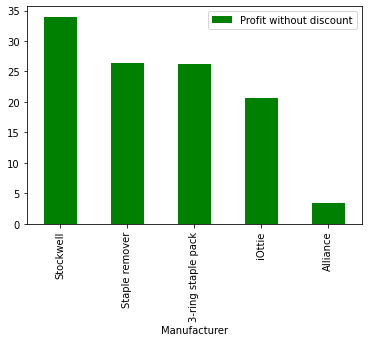

In [134]:
orders.groupby(["Manufacturer"]).agg({"Profit without discount":"sum"}).sort_values("Profit without discount", ascending= False).iloc[-5:].plot(kind="bar",color="Green")

### WITHOUT DISCOUNT WERE LOSSES INCURRED
- Without discounts the losses incurred is 0. which proves that discount is the sole factor responsible for the losses incurred

In [138]:
losses2 = orders[orders["Profit without discount"]<0]

In [139]:
losses2["Profit without discount"].sum()

-5.577760475716786e-13

## WHAT PERCENTAGE OF NUMBER OF TRANSACTIONS WAS A LOSS AND WHAT %LOSS WERE INCURED BY THESE TRANSACTIONS
- 36% of the discounted transaction had a loss. they had a total loss of 12% with respect to their total cost price
- The other transactions had a total profit of Only 9.5%

In [140]:
" NUMBER OF TRANSACTIONS THAT HAD A DISCOUNT 'ndis' "
Discounted_orders = orders[orders["Discount"]>0]
ndis = Discounted_orders.shape[0]

In [150]:
" NUMBER OF TRANSACTION THAT HAD A DISCOUNT AND INCURED A LOSS 'ndis_loss' "
#orders[(orders["Discount"]>0) & (orders["Profit"]<0)].shape[0]
ndis_loss = Discounted_orders[Discounted_orders["Profit"]<0].shape[0]

In [151]:
" Percentage of discounted transactions that had a loss"
(ndis_loss/ndis)*100

36.03665917343939

In [143]:
"THE PERCENTAGE OF LOSS INCURED BY DISCOUNTED TRANSACTIONS THAT HAD A LOSS"
Loss_dis = Discounted_orders[Discounted_orders["Profit"]<0]["Profit"].sum()
total_cost_price_discounted_orders = Discounted_orders["Cost Price"].sum()
(Loss_dis/total_cost_price_discounted_orders)*100

-12.12156000674732

In [144]:
Loss_dis

-169918.27410000004

In [145]:
"THE PERCENTAGE OF PROFIT INCURED BY DISCOUNTED TRANSACTIONS THAT HAD A PROFIT"
Profit_dis = Discounted_orders[Discounted_orders["Profit"]>0]["Profit"].sum()
total_cost_price_discounted_orders = Discounted_orders["Cost Price"].sum()
(Profit_dis/total_cost_price_discounted_orders)*100

9.451426522155637

In [146]:
Profit_dis

132488.72929999998

### HOW CAN LOSSES INCURED BY DISCOUNTS BE REDUCED OR MITIGATED
- The maximum discount at which there was a profit was 40% transactions discounted above 40% had a loss. 
- at a maximum allowable discount of 25-35% the percentage loss incurred reduced to 2.6-5.2%

In [152]:
Discounted_order_Profit = Discounted_orders[Discounted_orders["Profit"]>0]
Discounted_order_Loss = Discounted_orders[Discounted_orders["Profit"]< 0]

In [153]:
Discounted_order_Profit["Discount"].unique()

array([0.2 , 0.1 , 0.4 , 0.15, 0.3 ])

In [154]:
Discounted_order_Loss["Discount"].unique()

array([0.6 , 0.3 , 0.5 , 0.4 , 0.2 , 0.8 , 0.7 , 0.45, 0.15, 0.32, 0.1 ])

In [156]:
"""
Defining a functioon the limits the maximum allowable discount, calculates the new discounted amount 
Profit and the sale price and returns the percentage loss and the loss incurred at the limit
"""
def discounted_data(df,percent):
    df_40 = df.copy()
    def fourty_percent_cap(discount):
        if discount <= percent:
            return discount
        else:
            return percent
    df_40["new_discount"] = df_40["Discount"].apply(fourty_percent_cap)
    df_40["Discounted Amount"] = df_40["new_discount"] * df_40["Sales without discount"]
    df_40["Sales"] =  df_40["Sales without discount"] - df_40["Discounted Amount"]
    df_40["Profit"] =  df_40["Sales"] - df_40["Cost Price"]
    #df_40["Profit_or_Loss"] = df_40["Profit"].apply(Profit_or_loss)
    #loss = df_40[(df_40["Discount"]>0) & (df_40["Profit_or_Loss"]=="Loss")].shape[0]
    loss = df_40[df_40["Profit"]<0]["Profit"].sum()
    total = df_40["Cost Price"].sum()
    percentage_loss = (loss/total)*100
    return percentage_loss, loss
 


#### PLACING A LIMIT ON THE ALLOWABLE DISCOUNT

In [157]:
discounted_data(Discounted_orders,0.35)

(-5.182754621263588, -72651.1043)

In [158]:
discounted_data(Discounted_orders,0.25)

(-2.6421287298132485, -37036.97820000001)

### WHAT OTHER MEASURE CAN BE USED TO INCRAESE THE PROFIT OF DISCOUNTED ORDERS
- at a maximum allowable discounted amount of 500-1000 and a maximum allowable discount of 25-35%, the percentage loss reduced to 2.4-4.5%

In [159]:
def discounted_dataframe(df,percent):
    df_40 = df.copy()
    def fourty_percent_cap(discount):
        if discount <= percent:
            return discount
        else:
            return percent
    df_40["new_discount"] = df_40["Discount"].apply(fourty_percent_cap)
    df_40["Discounted Amount"] = df_40["new_discount"] * df_40["Sales without discount"]
    df_40["Sales"] =  df_40["Sales without discount"] - df_40["Discounted Amount"]
    df_40["Profit"] =  df_40["Sales"] - df_40["Cost Price"]
    #df_40["Profit_or_Loss"] = df_40["Profit"].apply(Profit_or_loss)
    #loss = df_40[(df_40["Discount"]>0) & (df_40["Profit_or_Loss"]=="Loss")].shape[0]
    loss = df_40[df_40["Profit"]<0]["Profit"].sum()
    total = df_40["Cost Price"].sum()
    percentage_loss = (loss/total)*100
    return df_40
 


In [160]:
Z = discounted_dataframe(Discounted_order_Loss,0.25)

In [161]:
Z["Discounted Amount"].max()

11319.24

<AxesSubplot:>

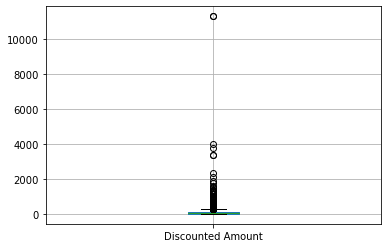

In [162]:
Z[["Discounted Amount"]].boxplot()

In [163]:
def discounted_data2(df,percent,max_discount_amount):
    df_40 = df.copy()
    def fourty_percent_cap(discount):
        if discount <= percent:
            return discount
        else:
            return percent
    def max_discount(discount_amount):
        if discount_amount > max_discount_amount:
            discount_amount = max_discount_amount
            return discount_amount
        else: 
            discount_amount = discount_amount
            return discount_amount
        
    df_40["new_discount"] = df_40["Discount"].apply(fourty_percent_cap)
    df_40["Discounted Amount"] = df_40["new_discount"] * df_40["Sales without discount"]
    df_40["Discounted Amount"] = df_40["Discounted Amount"].apply(max_discount)
    df_40["Sales"] =  df_40["Sales without discount"] - df_40["Discounted Amount"]
    df_40["Profit"] =  df_40["Sales"] - df_40["Cost Price"]
    #df_40["Profit_or_Loss"] = df_40["Profit"].apply(Profit_or_loss)
    #loss = df_40[(df_40["Discount"]>0) & (df_40["Profit_or_Loss"]=="Loss")].shape[0]
    loss = df_40[df_40["Profit"]<0]["Profit"].sum()
    total = df_40["Cost Price"].sum()
    percentage_loss = (loss/total)*100
    return percentage_loss,loss
 


In [172]:
discounted_data2(Discounted_orders,0.25,500)

(-2.3709950349249915, -33236.265300000014)

### APPLYING A MAXIMUM ALLOWABLE DISCOUNT OF 2.5% AND MAXIMUM ALLOWABLE DISCOUNT AMOUNT OF $1000 WHAT WOULD BE THE EFFECT ON THE NET PROFIT 

- The Net Profit increases by 81.4%

In [190]:
def discounted_data3(df,percent,max_discount_amount):
    df_40 = df.copy()
    def fourty_percent_cap(discount):
        if discount <= percent:
            return discount
        else:
            return percent
    def max_discount(discount_amount):
        if discount_amount > max_discount_amount:
            discount_amount = max_discount_amount
            return discount_amount
        else: 
            discount_amount = discount_amount
            return discount_amount
        
    df_40["new_discount"] = df_40["Discount"].apply(fourty_percent_cap)
    df_40["Discounted Amount"] = df_40["new_discount"] * df_40["Sales without discount"]
    df_40["Discounted Amount"] = df_40["Discounted Amount"].apply(max_discount)
    df_40["Sales"] =  df_40["Sales without discount"] - df_40["Discounted Amount"]
    df_40["Profit"] =  df_40["Sales"] - df_40["Cost Price"]
    Netprofit = df_40["Profit"].sum()
    total = df_40["Cost Price"].sum()
    percentage_profit = (Netprofit/total)*100
    return df_40
 


In [212]:
new_profit = discounted_data3(orders,0.35,1000)["Profit"].sum()

In [213]:
old_profit = orders["Profit"].sum()

In [214]:
# percentage increase in profit
((new_profit-old_profit)/old_profit)*100

66.57906621735522

# RETURNED GOODS

### HOW MANY ORDERS WERE RETURNED

In [194]:
Number_of_returend_orders = returned_orders.shape[0]
Number_of_returend_orders

950

### WHAT PERCENTAGE OF ORDERS WERE RETURNED

In [195]:
Total_number_of_orders = orders_all.shape[0]
(Number_of_returend_orders/Total_number_of_orders)*100

7.930545120627765

### WHAT IS TOTAL AMOUNT OF ORDERS RETURNED

In [196]:
returned_orders.Sales.sum()

209704.4659

### HOW MUCH PROFIT WAS LOST DUE TO RETURNED ORDERS

In [197]:
returned_orders.Profit.sum()

23693.745799999993

### WHICH REGIONS HAD THE HIGHEST RETURNEDS

In [198]:
returned_orders.groupby("Region").agg({"Order ID":"count", "Sales":"sum", "Profit":"sum"})

,Order ID,Sales,Profit
Region,,,
Central,118,18253.8994,-7359.6558
East,178,52087.3060,6316.6534
South,83,20239.2530,2835.5329
West,571,119124.0075,21901.2153


### WHICH CITY HAD THE HIGHEST RETURN

In [199]:
returned_orders.groupby("State").agg({"Order ID":"count", "Sales":"sum", "Profit":"sum"}).sort_values("Order ID", ascending=False).head()

,Order ID,Sales,Profit
State,,,
California,383,71296.2965,12454.9207
Washington,90,27455.5420,9723.7184
New York,74,26952.4800,7762.3250
Texas,56,12553.5424,-8184.4592
Ohio,39,9364.1170,-3721.1861


### WHICH MANUFACTURERS HAD THE HIGHEST RETURN

In [200]:
returned_orders.groupby("Manufacturer").agg({"Order ID":"count", "Sales":"sum", "Profit":"sum"}).sort_values("Order ID", ascending=False).head()

,Order ID,Sales,Profit
Manufacturer,,,
Other,166,22580.628,3080.0948
Xerox,104,7459.556,3405.4028
Avery,41,1843.176,695.7793
GBC,37,7871.201,-6404.4976
Global,30,11976.783,868.6481


In [201]:
orders.groupby("Manufacturer").agg({"Order ID":"count", "Sales":"sum", "Profit":"sum"}).sort_values("Order ID", ascending=False).head()

,Order ID,Sales,Profit
Manufacturer,,,
Other,2085,361019.9867,44414.0439
Xerox,925,63137.0860,24409.2532
Avery,633,14515.8410,4116.8439
GBC,357,104636.3220,10590.1776
Global,315,144909.6000,11557.8532


### WHICH CATEGORY HAD THE HIGHEST RETURNED ORDERS

In [202]:
returned_orders.groupby("Sub-Category").agg({"Order ID":"count", "Sales":"sum", "Profit":"sum"}).sort_values("Order ID", ascending=False).head()

,Order ID,Sales,Profit
Sub-Category,,,
Binders,161,12840.037,-5454.9094
Paper,150,9018.218,4126.8651
Phones,96,32372.160,3106.6559
Furnishings,87,10236.780,2255.4094
Accessories,70,14443.086,3108.5253


In [203]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Manufacturer,Unit Price,Cost Price,Percentage Loss or Profit,Discount_1,Sales without discount,Unit Price Without Discount,Profit without discount,Discounted Amount
0,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,No,Eldon,6.980,34.6906,40.845070,1.0,48.86,6.98,14.1694,0.000
1,7,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,No,Newell,1.820,5.3144,36.986301,1.0,7.28,1.82,1.9656,0.000
2,8,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,No,Mitel,151.192,816.4368,11.111111,0.8,1133.94,188.99,317.5032,226.788
3,9,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,No,DXL,6.168,12.7215,45.454545,0.8,23.13,7.71,10.4085,4.626
4,10,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,No,Belkin,22.980,80.4300,42.857143,1.0,114.90,22.98,34.4700,0.000


In [204]:
def discounted_dataframe2(df,percent,max_discount_amount):
    df_40 = df.copy()
    def fourty_percent_cap(discount):
        if discount <= percent:
            return discount
        else:
            return percent
    def max_discount(discount_amount):
        if discount_amount > max_discount_amount:
            discount_amount = max_discount_amount
            return discount_amount
        else: 
            discount_amount = discount_amount
            return discount_amount
        
    df_40["new_discount"] = df_40["Discount"].apply(fourty_percent_cap)
    df_40["Discounted Amount"] = df_40["new_discount"] * df_40["Sales without discount"]
    df_40["Discounted Amount"] = df_40["Discounted Amount"].apply(max_discount)
    df_40["Sales"] =  df_40["Sales without discount"] - df_40["Discounted Amount"]
    df_40["Profit"] =  df_40["Sales"] - df_40["Cost Price"]
    #df_40["Profit_or_Loss"] = df_40["Profit"].apply(Profit_or_loss)
    #loss = df_40[(df_40["Discount"]>0) & (df_40["Profit_or_Loss"]=="Loss")].shape[0]
    loss = df_40[df_40["Profit"]<0]["Profit"].sum()
    total = df_40["Cost Price"].sum()
    percentage_loss = (loss/total)*100
    return df_40

In [207]:
orders_with_recommedede_Limitations = discounted_dataframe2(orders,0.25,1000)

In [208]:
orders_with_recommedede_Limitations.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Manufacturer,Unit Price,Cost Price,Percentage Loss or Profit,Discount_1,Sales without discount,Unit Price Without Discount,Profit without discount,Discounted Amount,new_discount
0,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,No,Eldon,6.980,34.6906,40.845070,1.0,48.86,6.98,14.1694,0.000,0.0
1,7,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,No,Newell,1.820,5.3144,36.986301,1.0,7.28,1.82,1.9656,0.000,0.0
2,8,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,No,Mitel,151.192,816.4368,11.111111,0.8,1133.94,188.99,317.5032,226.788,0.2
3,9,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,No,DXL,6.168,12.7215,45.454545,0.8,23.13,7.71,10.4085,4.626,0.2
4,10,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,No,Belkin,22.980,80.4300,42.857143,1.0,114.90,22.98,34.4700,0.000,0.0


In [471]:
#orders.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\Untitled Folder\unreturned orders.csv", index= True)
#orders_all.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\Untitled Folder\all orders.csv", index= True)
#orders_with_recommedede_Limitations.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\Untitled Folder\orders experimental.csv", index= True)
#orders_all.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\Untitled Folder\all orders.csv", index= True)